In [506]:
import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, recall_score, precision_score
from keras.models import Sequential,load_model
from keras.layers import Dense, Dropout, LSTM

In [507]:
train_df = pd.read_csv('PM_train.txt', sep=" ", header=None)
train_df.drop(train_df.columns[[26, 27]], axis=1, inplace=True)
train_df.columns = ['id', 'cycle', 'setting1', 'setting2', 'setting3', 's1', 's2', 's3',
                     's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14',
                     's15', 's16', 's17', 's18', 's19', 's20', 's21']

train_df = train_df.sort_values(['id','cycle'])

test_df = pd.read_csv('PM_test.txt', sep=" ", header=None)
test_df.drop(test_df.columns[[26, 27]], axis=1, inplace=True)
test_df.columns = ['id', 'cycle', 'setting1', 'setting2', 'setting3', 's1', 's2', 's3',
                     's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14',
                     's15', 's16', 's17', 's18', 's19', 's20', 's21']

truth_df = pd.read_csv('PM_truth.txt', sep=" ", header=None)
truth_df.drop(truth_df.columns[[1]], axis=1, inplace=True)
train_df.head(),truth_df.head()

(   id  cycle  setting1  setting2  setting3      s1      s2       s3       s4  \
 0   1      1   -0.0007   -0.0004     100.0  518.67  641.82  1589.70  1400.60   
 1   1      2    0.0019   -0.0003     100.0  518.67  642.15  1591.82  1403.14   
 2   1      3   -0.0043    0.0003     100.0  518.67  642.35  1587.99  1404.20   
 3   1      4    0.0007    0.0000     100.0  518.67  642.35  1582.79  1401.87   
 4   1      5   -0.0019   -0.0002     100.0  518.67  642.37  1582.85  1406.22   
 
       s5  ...     s12      s13      s14     s15   s16  s17   s18    s19  \
 0  14.62  ...  521.66  2388.02  8138.62  8.4195  0.03  392  2388  100.0   
 1  14.62  ...  522.28  2388.07  8131.49  8.4318  0.03  392  2388  100.0   
 2  14.62  ...  522.42  2388.03  8133.23  8.4178  0.03  390  2388  100.0   
 3  14.62  ...  522.86  2388.08  8133.83  8.3682  0.03  392  2388  100.0   
 4  14.62  ...  522.19  2388.04  8133.80  8.4294  0.03  393  2388  100.0   
 
      s20      s21  
 0  39.06  23.4190  
 1  39.00  2

In [21]:
test_df

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,521.72,2388.03,8125.55,8.4052,0.03,392.0,2388.0,100.0,38.86,23.3735
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,522.16,2388.06,8139.62,8.3803,0.03,393.0,2388.0,100.0,39.02,23.3916
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,521.97,2388.03,8130.10,8.4441,0.03,393.0,2388.0,100.0,39.08,23.4166
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,521.38,2388.05,8132.90,8.3917,0.03,391.0,2388.0,100.0,39.00,23.3737
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,522.15,2388.03,8129.54,8.4031,0.03,390.0,2388.0,100.0,38.99,23.4130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11934,92,102,0.0045,-0.0003,100.0,518.67,642.86,1588.09,1415.99,14.62,...,521.14,2388.14,8125.23,8.4383,0.03,395.0,2388.0,100.0,38.88,23.2669
11935,92,103,0.0017,0.0001,100.0,518.67,643.18,1589.53,1411.04,14.62,...,520.65,2388.17,8123.80,8.4621,0.03,394.0,2388.0,100.0,38.78,23.1652
11936,92,104,0.0022,0.0001,100.0,518.67,642.67,1585.19,1413.07,14.62,...,521.19,2388.19,8120.47,8.4799,0.03,395.0,2388.0,100.0,38.57,23.1764
11937,92,105,0.0016,0.0001,100.0,518.67,642.69,1588.70,1409.71,14.62,...,521.40,2388.16,8124.38,8.4409,0.03,394.0,2388.0,100.0,38.93,23.2726


count    100.000000
mean     206.310000
std       46.342749
min      128.000000
25%      177.000000
50%      199.000000
75%      229.250000
max      362.000000
Name: cycle, dtype: float64

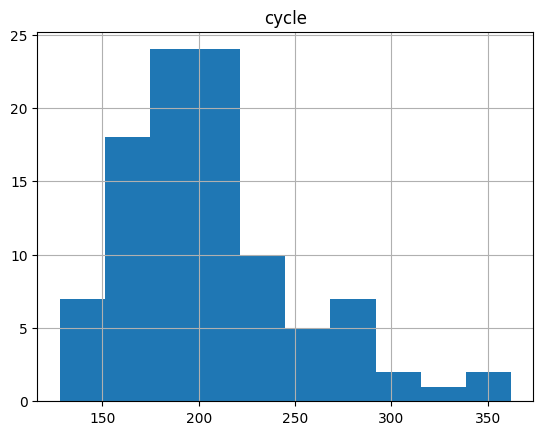

In [3]:
train_df.cycle.value_counts()
rul = pd.DataFrame(train_df.groupby('id')['cycle'].max()).reset_index()
rul[["cycle"]].hist()
rul["cycle"].describe()

In [508]:
import numpy as np
import pandas as pd

def findCorrelation(corr, cutoff=0.9, exact=None):
    """
    Parameters:
    -----------
    corr: pandas dataframe.
        A correlation matrix as a pandas dataframe.
    cutoff: float, default: 0.9.
        A numeric value for the pairwise absolute correlation cutoff
    exact: bool, default: None
        A boolean value that determines whether the average correlations be 
        recomputed at each step
    """
    
    def _findCorrelation_fast(corr, avg, cutoff):

        combsAboveCutoff = corr.where(lambda x: (np.tril(x)==0) & (x > cutoff)).stack().index

        rowsToCheck = combsAboveCutoff.get_level_values(0)
        colsToCheck = combsAboveCutoff.get_level_values(1)

        msk = avg[colsToCheck] > avg[rowsToCheck].values
        deletecol = pd.unique(np.r_[colsToCheck[msk], rowsToCheck[~msk]]).tolist()

        return deletecol


    def _findCorrelation_exact(corr, avg, cutoff):

        x = corr.loc[(*[avg.sort_values(ascending=False).index]*2,)]

        if (x.dtypes.values[:, None] == ['int64', 'int32', 'int16', 'int8']).any():
            x = x.astype(float)

        x.values[(*[np.arange(len(x))]*2,)] = np.nan

        deletecol = []
        for ix, i in enumerate(x.columns[:-1]):
            for j in x.columns[ix+1:]:
                if x.loc[i, j] > cutoff:
                    if x[i].mean() > x[j].mean():
                        deletecol.append(i)
                        x.loc[i] = x[i] = np.nan
                    else:
                        deletecol.append(j)
                        x.loc[j] = x[j] = np.nan
        return deletecol

    
    if not np.allclose(corr, corr.T) or any(corr.columns!=corr.index):
        raise ValueError("correlation matrix is not symmetric.")
        
    acorr = corr.abs()
    avg = acorr.mean()
        
    if exact or exact is None and corr.shape[1]<100:
        return _findCorrelation_exact(acorr, avg, cutoff)
    else:
        return _findCorrelation_fast(acorr, avg, cutoff)

In [509]:
#Variables altamente correlacionadas y con baja varianza
s=train_df.describe().T
s.sort_values("std")
print(s[s["std"]<0.0001].index)

corr = train_df.drop(s[s["std"]<0.0001].index,axis=1).corr().abs()
corr
hc = findCorrelation(corr, cutoff=0.75)
print(hc)
drop_col=list(s[s["std"]<0.0001].index)+list(hc)
drop_col

train_df=train_df.drop(drop_col,axis=1)#[['s15', 's2', 's8', 's17', 's14', 's20', 's3', 's21']]
test_df=test_df.drop(drop_col,axis=1)#[['s15', 's2', 's8', 's17', 's14', 's20', 's3', 's21']]

Index(['setting3', 's1', 's5', 's10', 's16', 's18', 's19'], dtype='object')
['s11', 's4', 's12', 's7', 's13', 's9']


In [510]:
#Preparación de datos 
rul = pd.DataFrame(train_df.groupby('id')['cycle'].max()).reset_index()
rul.columns = ['id', 'max']
train_df = train_df.merge(rul, on=['id'], how='left')
train_df['RUL'] = train_df['max'] - train_df['cycle']
train_df.drop('max', axis=1, inplace=True)

w1 = 15
w0 = 90
train_df['label1'] = np.where((train_df['RUL'] <= w1+2) & (train_df['RUL'] >= w1-4), 1, 0 )
train_df['label2'] = np.where(train_df['RUL'] <= w0, 1, 0 )
train_df["aux"]=np.where((train_df['RUL'] < w1-4) , 1, 0 )
train_df=train_df[train_df["aux"]==0].drop("aux",axis=1)


# MinMax normalization (from 0 to 1)
train_df['cycle_norm'] = train_df['cycle']
explor=train_df.copy()
cols_normalize = train_df.columns.difference(['id','cycle','RUL','label1','label2'])
min_max_scaler = preprocessing.MinMaxScaler()
norm_train_df = pd.DataFrame(min_max_scaler.fit_transform(train_df[cols_normalize]), 
                             columns=cols_normalize, 
                             index=train_df.index)
join_df = train_df[train_df.columns.difference(cols_normalize)].join(norm_train_df)
train_df = join_df.reindex(columns = train_df.columns)

train_df=train_df[["id","label1","cycle_norm",'s15', 's2', 's8', 's17', 's14', 's20', 's3', 's21']]
train_df.shape

In [426]:
#preparación para importancia de valores
explorz=pd.concat([explor[explor["label1"]==1].groupby("id",as_index=False).mean(),explor[explor["label1"]==0].groupby("id",as_index=False).mean()]).sort_values("id")
explorz=explorz.drop(["cycle_norm"],axis=1)
explorz1=explorz[explorz["label1"]==1].melt("id",explorz.drop(["id","label1"],axis=1)).merge(explorz[explorz["label1"]==0].melt("id",explorz.drop(["id","label1"],axis=1)),on=["id","variable"])
explorz1["change"]=abs(1-explorz1["value_x"]/explorz1["value_y"])
result1=explorz1.sort_values(["id","change"],ascending=False)

explorz=pd.concat([train_df[train_df["label1"]==1].groupby("id",as_index=False).mean(),train_df[train_df["label1"]==0].groupby("id",as_index=False).mean()]).sort_values("id")
explorz=explorz.drop(["cycle_norm"],axis=1)
explorz1=explorz[explorz["label1"]==1].melt("id",explorz.drop(["id","label1"],axis=1)).merge(explorz[explorz["label1"]==0].melt("id",explorz.drop(["id","label1"],axis=1)),on=["id","variable"])
explorz1["change"]=abs(1-explorz1["value_x"]/explorz1["value_y"])
result2=result1.merge(explorz1,on=["id","variable"]).sort_values(["id","change_y"],ascending=False)
top_var=result2.groupby(["id"]).head(3)
top_var["variable"].value_counts()

variable
s15    62
s2     56
s8     51
s14    44
s17    27
s3     26
s20    20
s21    14
Name: count, dtype: int64

In [258]:
#variables con importancia
list(top_var["variable"].value_counts().index)[:-1]

['s2', 's15', 's8', 's14', 's3', 's17', 's21']

In [260]:
result2.variable.value_counts()
result3=result2.merge(top_var[["id","variable"]],how="inner",on=["id","variable"])#[result2["variable"]=="s14"]
result3.groupby("variable").agg({"value_x_x":"mean","value_y_x":"mean"}).rename({"value_x_x":"anormal","value_y_x":"normal"},axis=1)#[result3["variable"]=="s17"].head(20)

,anormal,normal
variable,,
s14,8208.770414,8149.030568
s15,8.514860,8.435264
s17,396.248677,393.120117
s2,643.590881,642.582297
s20,38.440804,38.758334
s21,23.066849,23.247304
s3,1602.738710,1589.666641
s8,2388.247507,2388.091900


In [289]:
#Resultados de variables importante por combinación
top_var3=result2.groupby(["id"],as_index=False).head(2)
top_var3["sort_var"]=top_var3["variable"].str.extract("(\d+)").astype("int")
top_var3=top_var3.sort_values(["id","sort_var"])


top_var3.groupby('id')['variable'].agg(', '.join).reset_index()["variable"].value_counts()

C:\Users\luisd\AppData\Local\Temp\ipykernel_6008\3923843841.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_var3["sort_var"]=top_var3["variable"].str.extract("(\d+)").astype("int")


variable
s2, s8      17
s8, s15     17
s3, s14     10
s14, s15    10
s2, s14      6
s14, s17     5
s2, s15      4
s14, s21     4
s8, s20      3
s15, s17     3
s8, s21      3
s8, s14      3
s3, s8       3
s2, s20      2
s2, s21      2
s20, s21     2
s17, s20     1
s2, s3       1
s3, s20      1
s3, s17      1
s15, s21     1
s15, s20     1
Name: count, dtype: int64

In [511]:
#preparación de los datos de testeo

# MinMax normalization (from 0 to 1)
test_df['cycle_norm'] = test_df['cycle']
norm_test_df = pd.DataFrame(min_max_scaler.transform(test_df[cols_normalize]), 
                            columns=cols_normalize, 
                            index=test_df.index)
test_join_df = test_df[test_df.columns.difference(cols_normalize)].join(norm_test_df)
test_df = test_join_df.reindex(columns = test_df.columns)
test_df = test_df.reset_index(drop=True)

#Generar lo necesario para añadir la columna de ciclo
rul = pd.DataFrame(test_df.groupby('id')['cycle'].max()).reset_index()
rul.columns = ['id', 'max']
truth_df.columns = ['more']
truth_df['id'] = truth_df.index + 1
truth_df['max'] = rul['max'] + truth_df['more']
truth_df.drop('more', axis=1, inplace=True)

# generate RUL for test data
test_df = test_df.merge(truth_df, on=['id'], how='left')
test_df['RUL'] = test_df['max'] - test_df['cycle']
test_df.drop('max', axis=1, inplace=True)

# generate label columns w0 and w1 for test data
test_df['label1'] = np.where((test_df['RUL'] <= w1+2) & (test_df['RUL'] >= w1-4), 1, 0 )
test_df['label2'] = test_df['label1']
test_df.loc[test_df['RUL'] <= w0, 'label2'] = 2
test_df["aux"]=np.where((test_df['RUL'] < w1-4) , 1, 0 )
test_df=test_df[test_df["aux"]==0].drop("aux",axis=1)

test_df=test_df[["id","label1","cycle_norm",'s15', 's2', 's8', 's17', 's14', 's20', 's3', 's21']]

test_df.head()

,id,label1,cycle_norm,s15,s2,s8,s17,s14,s20,s3,s21
0,1,0,0.000000,0.416710,0.698842,0.411765,0.500,0.248605,0.441176,0.406446,0.572675
1,1,0,0.003636,0.287494,0.193050,0.323529,0.625,0.493898,0.598039,0.496577,0.604258
2,1,0,0.007273,0.618578,0.482625,0.441176,0.625,0.327929,0.656863,0.453508,0.647880
3,1,0,0.010909,0.346653,0.474903,0.382353,0.375,0.376743,0.578431,0.373075,0.573024
4,1,0,0.014545,0.405812,0.501931,0.323529,0.250,0.318166,0.568627,0.460639,0.641598


In [515]:
#herramientas para hacer un grid search

from math import sqrt
from numpy import array
from numpy import mean
from pandas import DataFrame
from pandas import concat
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten , Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras import backend as K
from random import sample

from numpy import array

# univariate lstm example
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
import random
import itertools
import tensorflow.compat.v1 as tf
import random


def train_test_split(data, n_test=20):
	random.seed(0)
	ind=random.sample(range(1, 100), n_test)
	return data[~data["id"].isin(ind)], data[data["id"].isin(ind)]
	

def difference(data, order):
	return (data-data.shift(order)).dropna(axis=0,how="any")

def dataset_train(train1,nam_col="label1"):
  
	out_seq = array(train1[nam_col])
	out_seq = out_seq.reshape((len(out_seq), 1))

	count=1
	for i in train1.columns:
		
		in_seq=array(train1[i])
		in_seq = in_seq.reshape((len(in_seq), 1))
		if count==1:
			dataset=np.hstack((in_seq,out_seq))
			count+=1
			
		else:
			dataset=np.hstack((in_seq,dataset))
	return dataset


def split_sequences(sequences, n_steps_in, n_steps_out):
    X, y = list(), list()
    for i in range(len(sequences)):
    # find the end of this pattern
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out-1
        # check if we are beyond the dataset
        
        if out_end_ix > len(sequences):
           
            break
    # gather input and output parts of the pattern
        seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1:out_end_ix, -1]
        if out_end_ix==len(sequences)-4:
            X=random.sample(X,30)
            y=random.sample(y,30)
        else:
            pass	
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

def split_sequences_fin(sequences, n_steps_in, n_steps_out):
    X, y = list(), list()
    for i in range(len(sequences)):
    # find the end of this pattern
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out-1
        # check if we are beyond the dataset
       
        if out_end_ix > len(sequences):
            #print("ya")
            break
    # gather input and output parts of the pattern
        seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1:out_end_ix, -1]
        	
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

def measure_rmse(actual, predicted):
	return sqrt(mean_squared_error(actual, predicted))


# fit a model
def model_fit(train, config):
	
	n_input, n_filters, n_kernel, n_epochs, n_batch, n_diff, optimizer1,learn_rate, init_mode, activation1 = config
	print(config)
	print(train.columns)
	
	count=0
	
	for i in train["id"].unique():
		traina_aux=train[train["id"]==i]
		
	
		traina=traina_aux.drop("id",axis=1)
	
		traina=dataset_train(traina)
	
		traina_x, traina_y = split_sequences(traina, n_input,1)
	
		
		if count==0:
			train_x,train_y=(traina_x,traina_y)
		else:	
			train_x=np.concatenate((traina_x,train_x))
			train_y=np.concatenate((traina_y,train_y))
		count=count+1


	count=0
	data_fin=pd.DataFrame([])
	for i in train["id"].unique():
		traina_aux=train[train["id"]==i]
	
		data_fin=pd.concat([data_fin,traina_aux.reset_index(drop=True).iloc[n_input-1:]])
		traina=traina_aux.drop("id",axis=1)
	
		traina=dataset_train(traina)
		# print(traina)
		traina_x, traina_y = split_sequences_fin(traina, n_input,1)
	
		if count==0:
			traintot_x,traintot_y=(traina_x,traina_y)
		else:	
			traintot_x=np.concatenate((traintot_x,traina_x))
			traintot_y=np.concatenate((traintot_y,traina_y))
		count=count+1

	n_features=train_x.shape[2]
	model = Sequential()
	model.add(Conv1D(filters=n_filters, kernel_size=n_kernel, activation=activation1, input_shape=(n_input, n_features), kernel_initializer=init_mode))
	model.add(MaxPooling1D(pool_size=2))
	model.add(Flatten())
	model.add(Dense(1))
	model.compile(loss='mse', optimizer=optimizer1)
	K.set_value(model.optimizer.learning_rate, learn_rate)
	
	model.fit(train_x, train_y, epochs=n_epochs, batch_size=n_batch, verbose=0)
	return [model, train_x, train_y,traintot_x,traintot_y,data_fin] 

# forecast with the fit model
def model_predict(model, history, config):
	# unpack config
	n_input, _, _, _, _, n_diff, _, _, _, _ = config
	# prepare data
	correction = 0.0
	if n_diff > 0:
		correction = history.iloc[-n_diff,-1]
		history = difference(history, n_diff)
	

	x_input=np.array(history.iloc[-n_input:]).reshape(1,n_input,history.shape[1])
	
	print(x_input)
	yhat = model.predict(x_input, verbose=0)
	print(correction + yhat[0])
	return correction + yhat[0]

# walk-forward validation for univariate data
def walk_forward_validation(data, n_test, cfg):
	predictions = list()
	# split dataset
	train, test = train_test_split(data, n_test)
	# print(test)
	# fit model
	try:
		model = model_fit(train, cfg)[0]
		# seed history with training dataset
		count=0
		
		for i in test["id"].unique():
		
			testa=testa_aux.drop("id",axis=1)
		
			testa=dataset_train(testa)
			# print(traina)
			testa_x, testa_y = split_sequences(testa, n_input,1)
			# print(traina_y)
			if count==0:
				test_x,test_y=(testa_x,testa_y)
			else:	
				test_x=np.concatenate((test_x,testa_x))
				test_y=np.concatenate((test_y,testa_y))
			count=count+1	

		print(test_x.shape)
		yhat = model.predict(test_x, verbose=0)
		
		from sklearn.metrics import f1_score as f1
		z1=np.where(yhat>0.5,1,0)
		
		error=f1(z1,test_y)
		
	except:
		error=-1	
	print(' > %.3f' % error)
	return error

def model_fit_lstm(train, config):
	
	n_input, n_filters, n_kernel, n_epochs, n_batch, n_diff, optimizer1,learn_rate, init_mode, activation1 = config
	print(config)
	print(train.columns)
	
	count=0
	
	for i in train["id"].unique():
		traina_aux=train[train["id"]==i]
		
		
		traina=traina_aux.drop("id",axis=1)
		
		traina=dataset_train(traina)
		
		traina_x, traina_y = split_sequences(traina, n_input,1)
		
		if count==0:
			train_x,train_y=(traina_x,traina_y)
		else:	
			train_x=np.concatenate((traina_x,train_x))
			train_y=np.concatenate((traina_y,train_y))
		count=count+1


	count=0
	data_fin=pd.DataFrame([])
	for i in train["id"].unique():
		traina_aux=train[train["id"]==i]
	
		data_fin=pd.concat([data_fin,traina_aux.reset_index(drop=True).iloc[n_input-1:]])
		traina=traina_aux.drop("id",axis=1)
	
		traina=dataset_train(traina)
		
		traina_x, traina_y = split_sequences_fin(traina, n_input,1)
	
		if count==0:
			traintot_x,traintot_y=(traina_x,traina_y)
		else:	
			traintot_x=np.concatenate((traintot_x,traina_x))
			traintot_y=np.concatenate((traintot_y,traina_y))
		count=count+1


	print("antes de correr el modelo")
	print(train_x.shape,train_y.shape)
	n_features=train_x.shape[2]
	
	model = Sequential()
	
	model.add(LSTM(
         input_shape=(n_input, n_features),
         units=n_filters,
         return_sequences=True))
	model.add(Dropout(0.2))

	model.add(LSTM(
			units=int(n_filters/2),
			return_sequences=False))
	model.add(Dropout(0.2))

	model.add(Dense(units=1, activation='sigmoid'))
	model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])

		# fit model

	model.fit(train_x, train_y, epochs=n_epochs, batch_size=n_batch, verbose=0)

	
	K.set_value(model.optimizer.learning_rate, learn_rate)
	
	model.fit(train_x, train_y, epochs=n_epochs, batch_size=n_batch, verbose=0)
	return [model, train_x, train_y,traintot_x,traintot_y,data_fin] 

def walk_forward_validation_lstm(data, n_test, cfg):
	
	predictions = list()
	
	n_input, n_filters, n_kernel, n_epochs, n_batch, n_diff, optimizer1,learn_rate, init_mode, activation1 = cfg

	train, test = train_test_split(data, n_test)
	
	model = model_fit_lstm(train, cfg)[0]
	
	count=0
	
	for i in test["id"].unique():
	
		testa=testa_aux.drop("id",axis=1)
	
		testa=dataset_train(testa)
		
		testa_x, testa_y = split_sequences_fin(testa, n_input,1)
		
		if count==0:
			test_x,test_y=(testa_x,testa_y)
		else:	
			test_x=np.concatenate((test_x,testa_x))
			test_y=np.concatenate((test_y,testa_y))
		count=count+1	
	
	print(test_x.shape)
	yhat = model.predict(test_x, verbose=0)
	
	from sklearn.metrics import f1_score as f1
	z1=np.where(yhat>0.5,1,0)
	
	error=f1(z1,test_y)
	
	print(' > %.3f' % error)
	return error



# score a model, return None on failure
def repeat_evaluate(data, config, n_test,tip_mod, n_repeats=5):
	# convert config to a key
	key = config
	
	if tip_mod==1:
		scores = [walk_forward_validation(data, n_test, config) for _ in range(n_repeats)]
			# summarize score
		result = mean(scores)
	elif tip_mod==2:
		scores = [walk_forward_validation_lstm(data, n_test, config) for _ in range(n_repeats)]
			# summarize score
		result = mean(scores)	
		# except:
	# 	result= np.nan
	print('> Model[%s] %.3f' % (str(key), result))
	return (key, result)

# grid search configs
def grid_search(data, cfg_list, n_test, tip_mod=1):
	# evaluate configs
	scores = [repeat_evaluate(data, cfg, n_test, tip_mod) for cfg in cfg_list]
	# sort configs by error, asc
	scores.sort(key=lambda tup: tup[1])
	return scores

# create a list of configs to try
def model_configs():
	# define scope of configs
	n_input = [2,8,16]
	n_filters = [25,50,100,200]#,128]
	n_kernels = [3]#, 5]
	n_epochs = [15,20,30]
	n_batch = [500,2000,8000]#,64]
	n_diff = [0]#, 7]
	optimizer = ['adam', 'Adamax','Adagrad','SGD']#['adam','SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adamax', 'Nadam']
	learn_rate = [0.001, 0.1]#, 0.01, 0.3
	init_mode = ['uniform', 'lecun_uniform','normal','glorot_normal']#['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']
	activation = ['linear','relu','softplus', 'tanh']#['relu','softmax', 'softplus', 'softsign', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']

	num_comb=0.002
	configs = list(itertools.product(n_input,n_filters,n_kernels,n_epochs,n_batch,n_diff,optimizer,learn_rate,init_mode,activation))
	if num_comb>1:
		configs = sample(configs,int(num_comb))
	else:
		configs = sample(configs,int(len(configs)*num_comb))
	print('Total configs: %d' % len(configs))
	return configs


In [1]:
#correr el modelo
sensor_cols = ['s' + str(i) for i in range(1,22)]
sequence_cols = ['setting1', 'setting2', 'setting3', 'cycle_norm', "label1","id"]
sensor_cols.extend(sequence_cols)
sensor_cols=list(set(sensor_cols)-set(drop_col))
data=train_df[["id","label1",'s15', 's2', 's8', 's17', 's14', 's20', 's3', 's21']]#[sensor_cols]
n_test = 30
cfg_list = model_configs()
scores = grid_search(data, cfg_list, n_test,2)

# Entrenamiento modelo final

In [499]:
scores.sort(key=lambda tup: tup[1],reverse=True)
scores


[((16, 200, 3, 20, 2000, 0, 'Adagrad', 0.1, 'glorot_normal', 'relu'),
  0.940438871473354),
 ((16, 100, 3, 15, 500, 0, 'Adamax', 0.001, 'uniform', 'relu'),
  0.940438871473354),
 ((16, 50, 3, 20, 500, 0, 'SGD', 0.1, 'uniform', 'relu'), 0.940438871473354),
 ((16, 25, 3, 20, 500, 0, 'adam', 0.001, 'lecun_uniform', 'relu'),
  0.8744454447831134),
 ((16, 100, 3, 30, 8000, 0, 'Adagrad', 0.1, 'lecun_uniform', 'tanh'),
  0.8693494272780754),
 ((16, 200, 3, 20, 2000, 0, 'Adagrad', 0.1, 'uniform', 'tanh'),
  0.7523510971786833),
 ((16, 100, 3, 20, 500, 0, 'Adamax', 0.001, 'normal', 'softplus'),
  0.7420695286396922),
 ((16, 100, 3, 15, 2000, 0, 'Adamax', 0.001, 'uniform', 'relu'),
  0.7420695286396922),
 ((16, 100, 3, 15, 2000, 0, 'Adamax', 0.001, 'lecun_uniform', 'tanh'),
  0.7083554793851894),
 ((16, 50, 3, 20, 500, 0, 'Adamax', 0.001, 'uniform', 'softplus'),
  0.5924027583416229),
 ((16, 25, 3, 30, 8000, 0, 'SGD', 0.1, 'lecun_uniform', 'relu'),
  0.5642633228840125),
 ((16, 100, 3, 15, 500, 

In [502]:
#entrenamiento final
pd.set_option('display.max_colwidth', None)
scores.sort(key=lambda tup: tup[1],reverse=True)
scores
n_input=16
z=pd.DataFrame([dict(scores).values(),dict(scores).keys()]).T.sort_values(0).head(30)

train_f, test_f = train_test_split(data, 30)
z=train_f.copy()
sco=list(scores[0][0])
# sco=list(scores[5][0])
# sco=[8,50,3,15,2000,7,"Adagrad",0.001,"glorot_normal","softplus"]
# sco=[8,25,3,50,500,0,"SGD",0.1,"uniform","tanh"]
# sco=[8,50,3,15,2000,0,"Adagrad",0.001,"glorot_normal","softplus"]
# sco= [16,200,3,30,500,0,"Adamax",0.001,"uniform","linear"]
# sco[3]=12
# sco[3]=50
print(sco)



# model = model_fit_lstm(train_f, sco)
model = model_fit(train_f, sco)
model,train_fx,train_fy,traintot_x,traintot_y,datos_fin_train=model[0],model[1],model[2],model[3],model[4],model[5]

count=0

data_fin_test=pd.DataFrame([])
for i in test_f["id"].unique():
	testa_aux=test_f[test_f["id"]==i]
	data_fin_test=pd.concat([data_fin_test,testa_aux])
	testa=testa_aux.drop("id",axis=1)
	testa=dataset_train(testa)
	testa_x, testa_y = split_sequences_fin(testa, n_input,1)
	if count==0:
		testaf_x,testaf_y=(testa_x,testa_y)
	else:	
		testaf_x=np.concatenate((testa_x,testaf_x))
		testaf_y=np.concatenate((testa_y,testaf_y))
	count=count+1	


predict=model.predict(train_fx)
predict

predictt=model.predict(testaf_x)
predictt

from sklearn.metrics import precision_score as precision
from sklearn.metrics import f1_score as f1


error=precision(np.where(predict>0.5,1,0),train_fy)
error
f1(np.where(predict>0.5,1,0),train_fy),f1(np.where(predictt>0.5,1,0),testaf_y)#,error


[16, 200, 3, 20, 2000, 0, 'Adagrad', 0.1, 'glorot_normal', 'relu']
[16, 200, 3, 20, 2000, 0, 'Adagrad', 0.1, 'glorot_normal', 'relu']
Index(['id', 'label1', 'cycle_norm', 's15', 's2', 's8', 's17', 's14', 's20',
       's3', 's21'],
      dtype='object')
121/121 [==============================] - 0s 925us/step


(0.9433962264150945, 0.8365650969529085)

In [503]:
precision(np.where(predictt>0.5,1,0),testaf_y)
f1(np.where(predictt>0.5,1,0),testaf_y)

0.8365650969529085

In [2]:
#revisión de predicciones
pd.set_option('display.max_rows', None)
datos_predf=pd.DataFrame({"Y":list(testaf_y.reshape(len(testaf_y))),"Y_pred":list(np.where(predictt>0.5,1,0).reshape(len(testaf_y)))})
datos_predf.head(100)

# Evaluación test

In [477]:

n_input=16
count=0
for i in test_df["id"].unique():

    testa=test_df[test_df["id"]==i].drop("id",axis=1)
    testa=dataset_train(testa)
    testa_x, testa_y = split_sequences_fin(testa, n_input,1)
    if count==0:
        testf_x,testf_y=(testa_x,testa_y)
    else:	
        testf_x=np.concatenate((testf_x,testa_x))
        testf_y=np.concatenate((testf_y,testa_y))
    count=count+1	


predict_val=model.predict(testf_x)
error=f1(np.where(predict_val>0.5,1,0),testf_y)
error

#['s20', 's6', 'setting1', 'setting2', 'label1', 's14', 's8', 's3', 's17',
    #    'cycle_norm', 's21', 's2', 's15']

312/312 [==============================] - 1s 2ms/step


0.8307692307692308

In [50]:

Z=pd.DataFrame({"Y":list(testf_y.reshape(len(testf_y))),"Y_pred":list(np.where(predict_val>0.5,1,0).reshape(len(testf_y)))})#.tail(2000)
Z[Z["Y"]==1]


,Y,Y_pred
1358,1.0,1
2752,1.0,1
6928,1.0,0
6929,1.0,1
7272,1.0,1


# Revisión visual de predicciones

In [18]:

np.sum(np.where(predict_val>0.5,1,0))
np.where(predict_val>0.5,1,0).reshape(len(testf_y))[:400]

6120

# Predicción total train

In [158]:
predict_traintot=model.predict(traintot_x)
datos_rev=pd.DataFrame({"Y":list(traintot_y.reshape(len(traintot_y))),"Y_pred":list(np.where(predict_traintot>0.5,1,0).reshape(len(traintot_y)))})
datos_rev.shape
f1(datos_rev["Y"],datos_rev["Y_pred"])

436/436 [==============================] - 3s 7ms/step


(13939, 2)

In [165]:
#unir predicciones con valores de la tabla
datos_rev1=pd.concat([datos_fin_train.reset_index(drop=True),datos_rev.reset_index(drop=True)],axis=1)
datos_rev1[datos_rev1["id"]==1].head()



,id,label1,cycle_norm,s15,s2,s8,s17,s14,s20,s3,s21,Y,Y_pred
0,1,0,0.019553,0.318199,0.410334,0.222222,0.250000,0.178181,0.643411,0.259865,0.574979,0.0,0
1,1,0,0.022346,0.184302,0.276596,0.333333,0.333333,0.147387,0.705426,0.434707,0.707539,0.0,0
2,1,0,0.025140,0.399000,0.151976,0.333333,0.416667,0.168508,0.627907,0.440375,0.794256,0.0,0
3,1,0,0.027933,0.419777,0.325228,0.333333,0.333333,0.232614,0.620155,0.233486,0.807097,0.0,0
4,1,0,0.030726,0.265102,0.258359,0.422222,0.250000,0.196383,0.713178,0.269675,0.651477,0.0,0
